# K Means Clustering - Flight Classification & Anomaly Detection

In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

## Data Cleaning

In [33]:
plane_df = pd.read_csv('2018.csv')
plane_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
sum_missing_values = plane_df.isna().sum()
print(sum_missing_values)

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64


In [35]:
plane_df = plane_df.drop(columns=['Unnamed: 27'])

In [36]:
plane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [37]:
plane_df['CANCELLATION_CODE'].fillna('E', inplace=True) #E means plane isn't cancelled
plane_df['CANCELLATION_CODE'].unique()

array(['E', 'B', 'A', 'C', 'D'], dtype=object)

In [38]:
missing_duration_cols = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 
                         'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
for col in missing_duration_cols:
    plane_df[col].fillna(0, inplace=True)

In [39]:
check_duration_na_fix = plane_df.isna().sum()
print(check_duration_na_fix)

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               112317
DEP_DELAY                   0
TAXI_OUT                    0
WHEELS_OFF             115829
WHEELS_ON              119246
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME               119245
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
dtype: int64


In [40]:
time_columns = ['DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME']

for col in time_columns:
    plane_df[col].fillna(0, inplace=True)

In [41]:
check_duration_na_fix = plane_df.isna().sum()
print(check_duration_na_fix)

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64


In [42]:
plane_df['FL_DATE']=pd.to_datetime(plane_df['FL_DATE'])
plane_df['FL_DATE']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
7213441   2018-12-31
7213442   2018-12-31
7213443   2018-12-31
7213444   2018-12-31
7213445   2018-12-31
Name: FL_DATE, Length: 7213446, dtype: datetime64[ns]

## Flight Classification Model 

A common practice for airport security services is the ability to monitor and detect any anomalous flight behaviour that could point towards an issue such as endangered passengers, excessive fuel usage, or significant flight delays. Anomalous flights are any flights that don't follow similar flight/delay/route habits that flights with similar characteristics share, indicating a potential issue. However, the reason it is difficult to identify anomalous flights is because it highly depends on what is considered a "normal" or standard flight. The classification of a normal vs abnormal flight depends on the behaviour of the general population rather than a pre-determined list of characteristics for normal flights. 

For this reason, an unsupervised ML model was used to classify flights into different groups. The model used is K means clustering. This ML model tends to divide the observations into k clusters depending on which cluster has the nearest mean to the observation. Similar obserations with similar means are grouped into the same cluster. Each cluster aims to minimize the variances within their cluster to ensure general uniformity within clusters. 

For classifying flights, this is especially useful since flights can now be classified into different categories based on their delay times and taxi in/out times.

### Feature Selection and Scaling

The first step to creating the K means clustering model is deciding which features are best to classify flights. Based on the Flight Dataset, it would be especially useful to classify the flights based on their delay times (Carrier, Weather, National Airport Security (NAS), Security, or Late Aircraft), as well as how late the plane departed (Departure Delay). Taxi in and out times also give insight into how long a plane stays grounded on the tarmac to eventually go on the runway (taxi-out) or arrive at a gate to offboard passengers (taxi-in). Any abnormalities in these values could signify an anomalous flight.

Note: Due to the size of the 2018 CSV and memory storage constraints, we will only be creating this model from a random sample of 25,000 rows.

In [84]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Use sample of 25,000 data rows from dataset
sampled_df = plane_df.sample(n=25000, random_state=42)

# Relevant features for clustering flights
selected_features = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY',
                     'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

X = sampled_df[selected_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Parameter Selection - Silhouette Analysis

The main parameter for this model is k, which signifies the number of clusters we wish to divide the flight data into. Ideally, K should be greater than or equal to 3 to enable sufficient differences between classifications without overfitting. To determine K, one can use the Silhouette Score approach to select the optimal K value for the model. 

Silhoutte Score is a scoring metric used to determine how well a model clustered its data into its k clusters. The score ranges from [-1, 1] where -1 implies that the clusters incorrectly assign the data points; 0 indicates that the differences between clusters is not significant enough to warrant cluster separation; 1 indicates that the clusters are significantly different and clearly distinguishable. 

For the purposes of this analysis, a silhoutte score above 0.70 will be deemed appropriate for flight classification purposes.

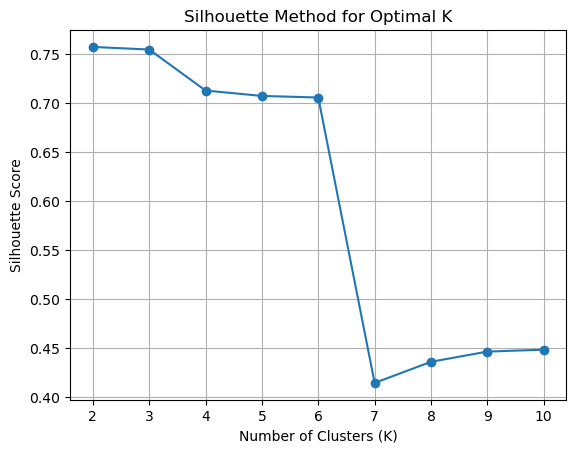

In [85]:
# Use Silhouette Score Analysis to determine optimal K value

silhouette_scores = []

#determine the silhouette scores for model with k=2 to 10 

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores to visually identify which reasonable k>=3 gives highest silhoutte score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Based on graph above, the optimal silhoutte score is at K=3 clusters. Moving forward, the K-means clustering model will assume K=3. 

### Model Fitting

In [86]:
# Train K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) #set K=3
kmeans.fit(X_scaled)

# Predict clusters
clusters = kmeans.predict(X_scaled)
clustered_df = pd.DataFrame(X_scaled, columns=selected_features)
clustered_df['Cluster'] = clusters #clusters 0, 1, 2

# Display silhoutte score for final K=3 model
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7550489924075787


The Silhoutte Score of ~0.76 indicates that the selected model has clusters that are significantly different, making it a reasonable clustering model.

### Feature Comparisons 

For the selected model features: ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], pairplots can help to uncover relationships among these features to help explain how the unsupervised model may have formed the cluster groups. This will provide insight for the airport security teams to understand what characteristics to look for in anomalous-tagged flights.

C:\Users\Nicol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


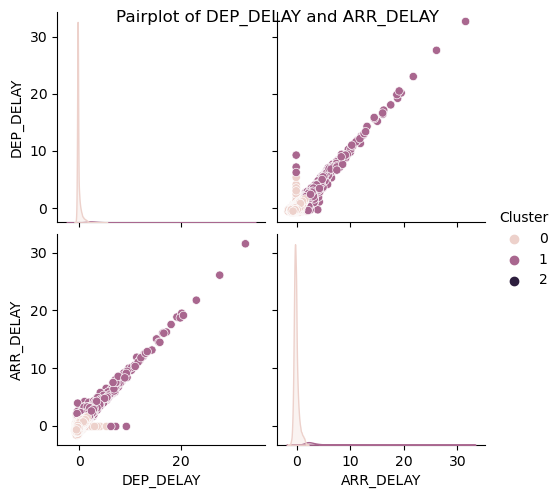

C:\Users\Nicol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


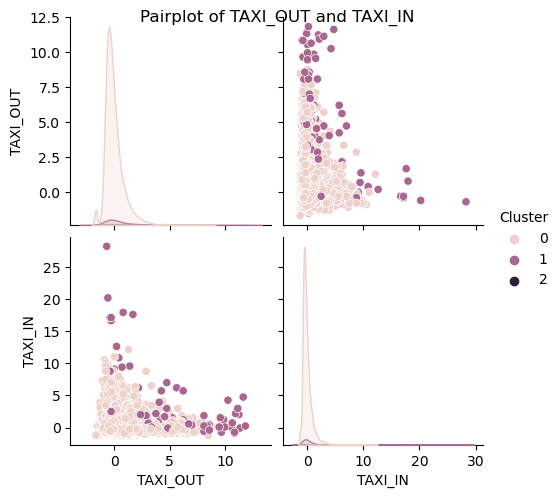

C:\Users\Nicol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


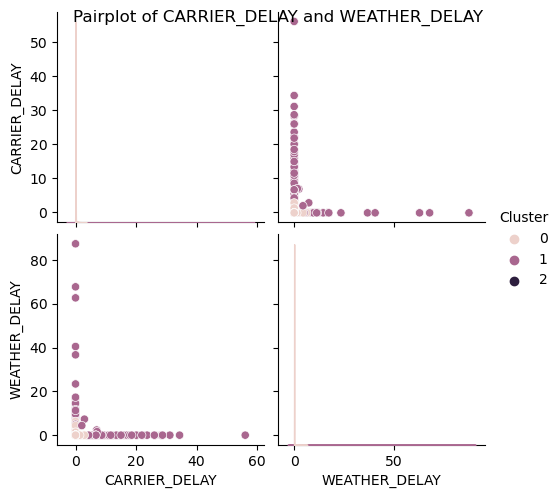

C:\Users\Nicol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


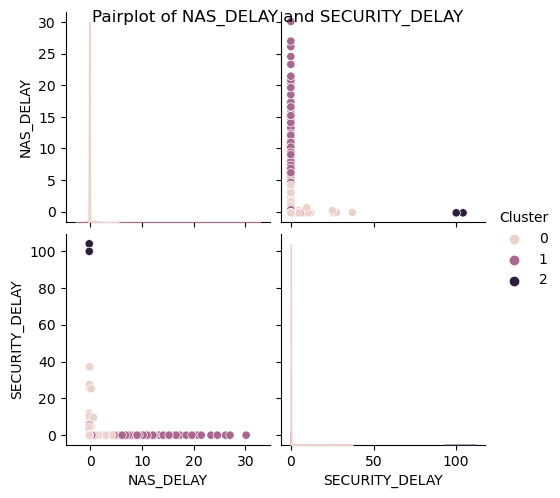

C:\Users\Nicol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


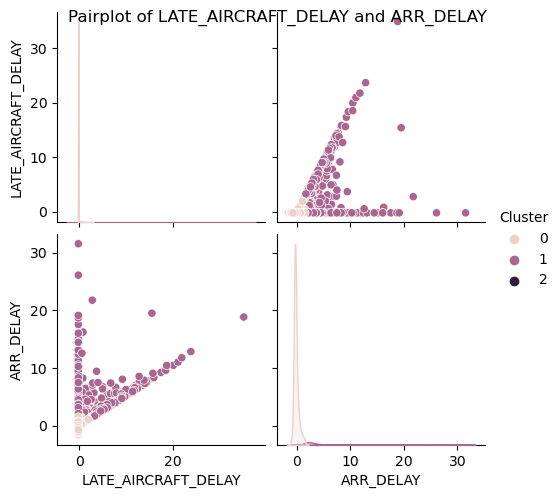

In [87]:
import seaborn as sns

feature_pairs = [
    ('DEP_DELAY', 'ARR_DELAY'),
    ('TAXI_OUT', 'TAXI_IN'),
    ('CARRIER_DELAY', 'WEATHER_DELAY'),
    ('NAS_DELAY', 'SECURITY_DELAY'),
    ('LATE_AIRCRAFT_DELAY', 'ARR_DELAY')
]

for pair in feature_pairs:
    sns.pairplot(clustered_df, hue='Cluster', vars=pair)
    plt.suptitle(f'Pairplot of {pair[0]} and {pair[1]}')
    plt.show()

The following findings are shown in the pairplots above:
* Cluster 0 appears to have no correlation between departure delay and arrival delay while Cluster 1 has a positive correlation between departure/arrival delays
* Cluster 1 tends to have higher taxi out times and lower taxi in times than flights in Cluster 0
* All clusters generally do not experience delays due to weather and the airline at the same time
* Cluster 1 flights tend to experience far more delays due to carriers or weather than flights in Cluster 0
* Flights in Cluster 2 tend to face significant security delays (100+ minutes)
* Flights in Cluster 0 tend to face more security delays than Cluster 1 flights but Cluster 1 flights face more National Airport Security delays than Cluster 0
* Cluster 1 flights are most impacted by arrival delays and aircraft delays than other cluster flights

### Cluster Variance Analysis

One good indication of anomalous flights also lies in the cluster variance among features. If a cluster contains high variance among its features, it indicates a less cohesive cluster group, which may uncover flights that do not share common traits with flights in other clusters or even their own cluster. This could indicate that these flights are anomalous as they vary in a way that cannot be easily detected by the model due to the randomness in the feature values.

In [88]:
# Cluster variances

variance_per_cluster = clustered_df.groupby('Cluster')[selected_features].var()

print("Variance per Cluster:")
print(variance_per_cluster)

Variance per Cluster:
         DEP_DELAY  TAXI_OUT   TAXI_IN  ARR_DELAY  CARRIER_DELAY  \
Cluster                                                            
0         0.145506  0.820755  0.840541   0.191960       0.089707   
1         7.515116  4.133658  4.133906   6.317487      16.991423   
2         0.037975  0.238732  0.051912   0.019435       0.000000   

         WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
Cluster                                                                 
0             0.048788   0.214014        0.171835             0.105720  
1            20.133162  13.902036        0.037741            11.818844  
2             0.000000   0.000000        8.531144             0.000000  


As shown in results above, Cluster 1 has significantly higher variance values for most of the selected features, displaying anomalous properties. Due to this variance analysis, Cluster 1 could be considered the anomalous flights cluster.

### Cluster Comparisons

In [89]:
#View flight logs for Cluster 1

anomalies = clustered_df[clusters == 1]
anomalies_df = pd.DataFrame(anomalies)
print(anomalies_df)

       DEP_DELAY   TAXI_OUT    TAXI_IN  ARR_DELAY  CARRIER_DELAY  \
29      2.021872   1.277397  -0.244330   2.561065      -0.139677   
40      2.435260  -0.598143   4.427805   2.429629      -0.139677   
69      2.205600   2.165810  -0.083222   2.736313      -0.139677   
105     2.481192  -0.104580  -0.888762   2.035322      -0.139677   
138    -0.389556  -0.302005  16.672020   1.925792      -0.139677   
...          ...        ...        ...        ...            ...   
24801  -0.435488  11.148659   2.977832   2.122946      -0.139677   
24845   2.779750  -0.104580  -0.405438   2.823937      -0.021896   
24882   2.550090  -0.104580  -0.566546   2.188664      -0.139677   
24914   1.998906  -0.598143  -0.244330   1.706733      -0.139677   
24994   2.389328  -0.302005   2.494508   2.561065      -0.139677   

       WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  Cluster  
29         -0.046365   7.417733       -0.015953            -0.203968        1  
40          8.441688  -

The model analyzed the 25,000 sample points and identified 1,160 flights that are flagged as "anomalous" due to their presence in a high variability cluster. This significantly assists airport security in the flight abnormality detection process. 

In [95]:
# Analyze Cluster 1 variance anomaly group

# Filter anomalies for cluster 1
cluster_1_anomalies = clustered_df[clusters == 1]

# Calculate average values for delay features in cluster 1
avg_values_cluster_1 = cluster_1_anomalies[selected_features].mean()

print("Average Values for Delay Features in Cluster 1:")
print(avg_values_cluster_1)

Average Values for Delay Features in Cluster 1:
DEP_DELAY              3.239921
TAXI_OUT               0.727840
TAXI_IN                0.376214
ARR_DELAY              3.275841
CARRIER_DELAY          1.613937
WEATHER_DELAY          0.642847
NAS_DELAY              1.764203
SECURITY_DELAY        -0.008040
LATE_AIRCRAFT_DELAY    2.686883
dtype: float64


As shown above, the average values for the delay features average around 0, meaning that the flights in this cluster are generally on time with minimal to no delay. These may have been classified as anomalous since most flights tend to have delays even if they are not significantly high (>1 hour). The reason this cluster is assumed to be anomalous is because of the high variance for the delay features compared to the other clusters.

In [96]:
# Analyzing Cluster 2

# Filter cluster 2
cluster_2_means = clustered_df[clusters == 2]

# Calculate average values for delay features in cluster 2
avg_values_cluster_2 = cluster_2_means[selected_features].mean()

print("Average Values for Delay Features in Cluster 2:")
print(avg_values_cluster_2)

Average Values for Delay Features in Cluster 2:
DEP_DELAY                4.961519
TAXI_OUT                -0.252649
TAXI_IN                 -0.566546
ARR_DELAY                4.762614
CARRIER_DELAY           -0.139677
WEATHER_DELAY           -0.046365
NAS_DELAY               -0.195406
SECURITY_DELAY         102.102949
LATE_AIRCRAFT_DELAY     -0.203968
dtype: float64


As shown above, the average values for the delay features average are generally negative (indicating early arrivals), except the security delay being 100+ minutes on average. These flights would be flagged for security examination due to their high security delay times, making them anomalous too.

In [97]:
#Analyzing Cluster 0

# Filter cluster 0
cluster_0_means = clustered_df[clusters == 0]

# Calculate average values for delay features in cluster 0
avg_values_cluster_0 = cluster_0_means[selected_features].mean()

print("Average Values for Delay Features in Cluster 0:")
print(avg_values_cluster_0)

Average Values for Delay Features in Cluster 0:
DEP_DELAY             -0.158077
TAXI_OUT              -0.035397
TAXI_IN               -0.018260
ARR_DELAY             -0.159808
CARRIER_DELAY         -0.078525
WEATHER_DELAY         -0.031278
NAS_DELAY             -0.085833
SECURITY_DELAY        -0.008175
LATE_AIRCRAFT_DELAY   -0.130731
dtype: float64


As shown above, the average values for the delay features average are all around 0, meaning that the flights in this cluster are generally on time with minimal to no delay. This cluster represents flights classified as "on-time".

### Conclusion

Overall, the aim of this model was to classify flights based on common mean times for delay and taxi times. The k=3 K Means Clustering model helped to identify potential anomalous flights and a variety of methods for detecting abnormal flights was used for this analysis: high variance, average cluster means, and feature comparisons. Silhoutte Analysis was a reasonable approach to hypertuning the K parameter in this model due to its ability to assess the significance in cluster differences. Based on the pairplot analysis, Cluster 1 flights had the highest delay values due to carriers, weather, and the aircraft along with high cluster variability. This all points to the general conclusion that Cluster 1 represents anomalous flights in the dataset.